In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hotel_data = pd.read_csv("hotel_bookings.csv")

In [3]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [4]:
Y = hotel_data["adr"]
Y

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 119390, dtype: float64

In [5]:
X = hotel_data.drop("adr", axis=1)
X.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Transient,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Transient,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Transient,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Transient,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Transient,0,1,Check-Out,03-07-2015


In [6]:
X.shape

(119390, 31)

In [7]:
X.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,8.000000,5.000000


In [8]:
X.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
# Here in children column we can replace the missing values by 0
# and in country column we can replace the missing values by unknown
# and in agent column we can replace the missing values with mean of the values
# as maximum values in the company columnn are missing so we can drop the column

In [10]:
X["children"].replace(np.nan, 0, inplace=True)

In [11]:
X['country'].replace(np.nan, "Unknown", inplace=True)

In [12]:
X = X.drop("company" , axis =1)

In [14]:
agent_mean = X['agent'].astype('float').mean(axis=0)
X['agent'].replace(np.nan, agent_mean, inplace=True)

In [23]:
X.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests   

<AxesSubplot:xlabel='hotel', ylabel='count'>

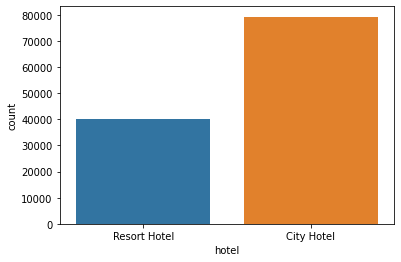

In [15]:
sns.countplot(data = X , x = "hotel")

<AxesSubplot:xlabel='hotel', ylabel='count'>

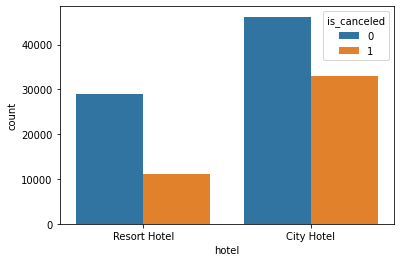

In [16]:
sns.countplot(data = X , x = "hotel" , hue = "is_canceled")

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

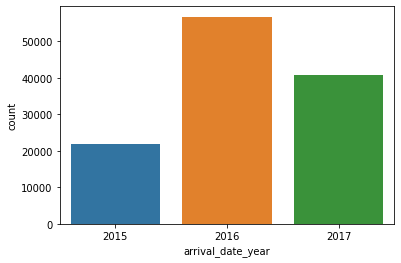

In [17]:
sns.countplot(data = X , x = "arrival_date_year")

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

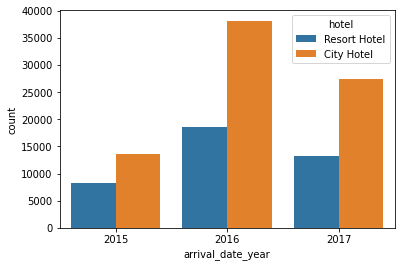

In [18]:
sns.countplot(data =X , x = "arrival_date_year",hue = "hotel")

In [19]:
months_cus = X.groupby("arrival_date_month").count()
months_cus

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
arrival_date_month,,,,,,,,,,,,,,,,,,,,,
April,11089,11089,11089,11089,11089,11089,11089,11089,11089,11089,...,11089,11089,11089,11089,11089,11089,11089,11089,11089,11089
August,13877,13877,13877,13877,13877,13877,13877,13877,13877,13877,...,13877,13877,13877,13877,13877,13877,13877,13877,13877,13877
December,6780,6780,6780,6780,6780,6780,6780,6780,6780,6780,...,6780,6780,6780,6780,6780,6780,6780,6780,6780,6780
February,8068,8068,8068,8068,8068,8068,8068,8068,8068,8068,...,8068,8068,8068,8068,8068,8068,8068,8068,8068,8068
January,5929,5929,5929,5929,5929,5929,5929,5929,5929,5929,...,5929,5929,5929,5929,5929,5929,5929,5929,5929,5929
July,12661,12661,12661,12661,12661,12661,12661,12661,12661,12661,...,12661,12661,12661,12661,12661,12661,12661,12661,12661,12661
June,10939,10939,10939,10939,10939,10939,10939,10939,10939,10939,...,10939,10939,10939,10939,10939,10939,10939,10939,10939,10939
March,9794,9794,9794,9794,9794,9794,9794,9794,9794,9794,...,9794,9794,9794,9794,9794,9794,9794,9794,9794,9794
May,11791,11791,11791,11791,11791,11791,11791,11791,11791,11791,...,11791,11791,11791,11791,11791,11791,11791,11791,11791,11791


<AxesSubplot:xlabel='arrival_date_month', ylabel='hotel'>

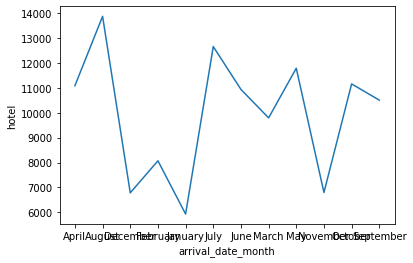

In [20]:
sns.lineplot(data = months_cus , x = "arrival_date_month" , y = "hotel")

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

ValueError: could not convert string to float: 'City Hotel'